In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case4_rk4 import rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth, rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


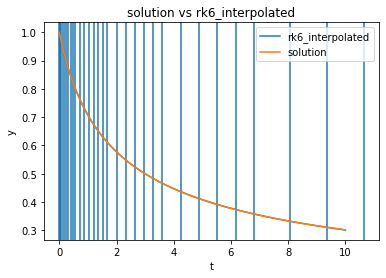

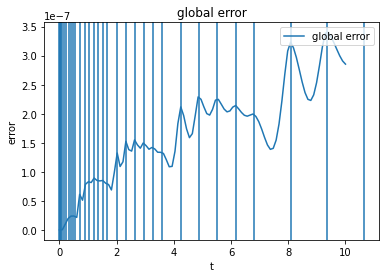

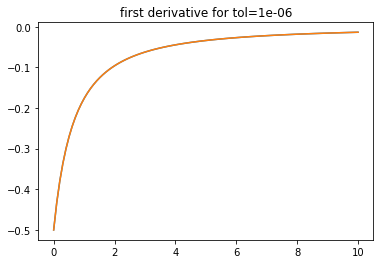

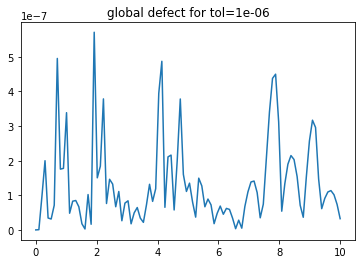

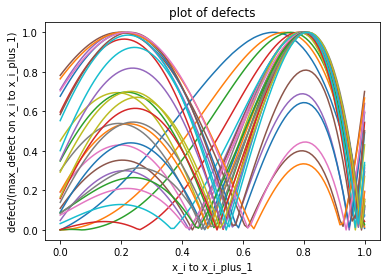

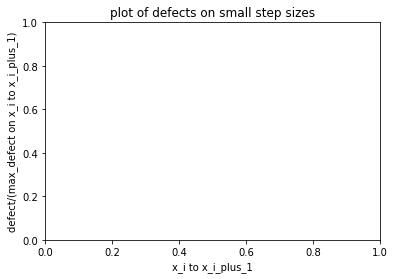

0.0
0.0
6.080691505871982e-13
1.8424817227469248e-11
4.988592872123832e-10
1.1571044788993845e-08
1.810526761847342e-08
2.1854094534035085e-08
2.3864681453211745e-08
2.4778788132451268e-08
2.4998162095890564e-08
6.448873990372306e-08
8.230104098227997e-08
8.908759963066615e-08
9.016477831025327e-08
8.829441744406807e-08
8.495415138032314e-08
8.0949834169175e-08
1.346016600400901e-07
1.5275220577315451e-07
1.550505706049421e-07
1.5027244748555546e-07
1.425165008228646e-07
1.3374698681900554e-07
2.1190810650661973e-07
2.3086143580153262e-07
2.2685431294577896e-07
2.1422036616813855e-07
1.9891350755418813e-07
3.2321070736474056e-07
3.421927789459822e-07
3.2676814820664646e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5000000000000007]
n_steps 86
n_successful_steps 81

integration complete


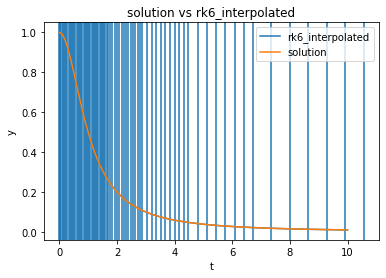

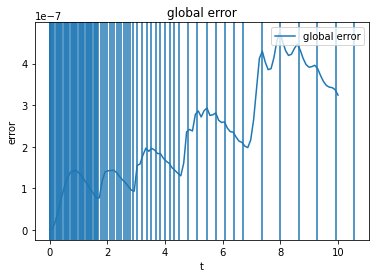

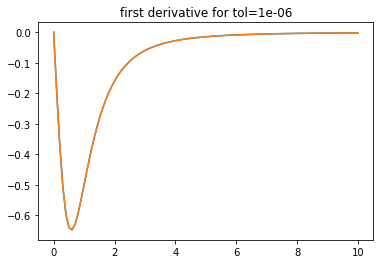

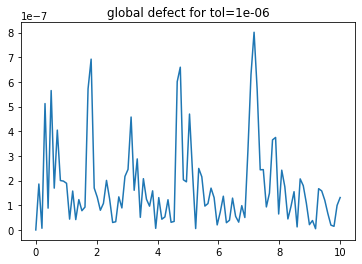

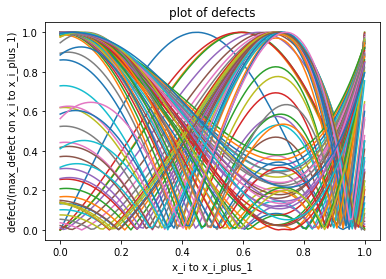

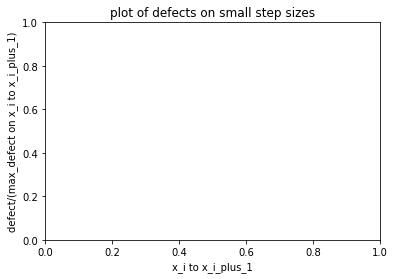

0.0
0.0
5.74651437545981e-13
3.727296249422807e-11
2.366712270607252e-09
7.0110067751372185e-09
1.3746190297148075e-08
2.2263929477794875e-08
3.219707356283408e-08
4.31468923922651e-08
5.470884723024483e-08
6.649460693175513e-08
7.814906866077109e-08
8.936208051313344e-08
9.987524207666354e-08
1.0948454054471313e-07
1.1803971067259056e-07
1.2544118155322082e-07
1.3163535772520163e-07
1.3660886066801936e-07
1.4038222873047346e-07
1.4300347794815593e-07
1.445418320589198e-07
1.450818636339335e-07
1.4471821119244055e-07
1.4355098254537069e-07
1.416818931065933e-07
1.3921114494497289e-07
1.3623501221582401e-07
1.3284407235358842e-07
1.2912200747505764e-07
1.2514488573200921e-07
1.2098083923550718e-07
1.166900531202053e-07
1.1232498953184233e-07
1.0793078153437108e-07
1.0354573998228034e-07
9.920192822754359e-08
9.49257688009908e-08
9.07386545345723e-08
8.66575431412997e-08
8.269552365103294e-08
7.886234232312717e-08
7.516488575998181e-08
7.160761728020049e-08
1.0520879714648323e-07
1.26841

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972]
n_steps 36
n_successful_steps 36

integration complete


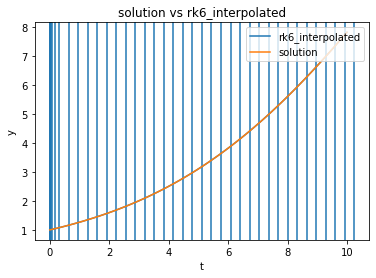

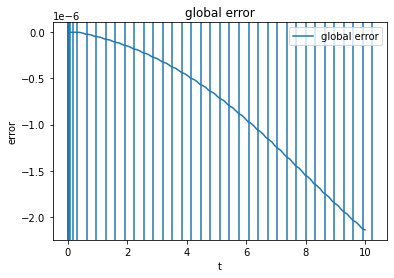

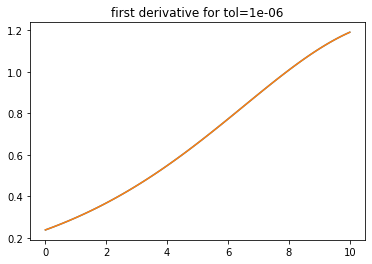

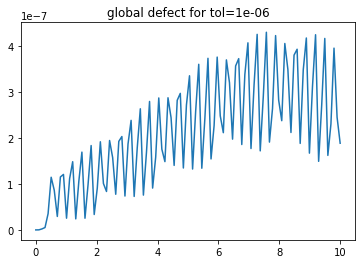

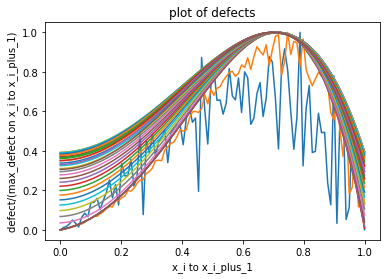

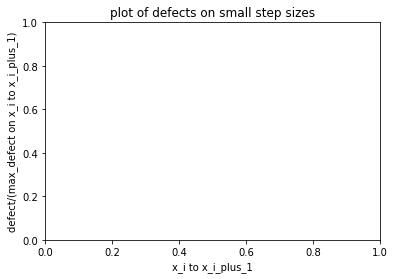

0.0
0.0
4.440892098500626e-16
2.0872192862952943e-14
6.776801342311956e-13
2.184030734042608e-11
7.086056186267342e-10
2.3291033324213117e-08
4.877199155650658e-08
7.734892348842948e-08
1.0921629001181543e-07
1.44562579906804e-07
1.835669585226185e-07
2.2639556984671572e-07
2.7319752016197185e-07
3.2410059169762917e-07
3.792067442276448e-07
4.385874872170348e-07
5.022792040065838e-07
5.702785470518279e-07
6.425380050245622e-07
7.189617821090621e-07
7.994020982948769e-07
8.836560572156316e-07
9.714631841184485e-07
1.0625037623057665e-06
1.1563980573114918e-06
1.2527065349487998e-06
1.3509311349579889e-06
1.450517697065834e-06
1.5508595705426842e-06
1.6513025089537336e-06
1.7511508572098933e-06
1.8496751188479266e-06
1.9461208866644597e-06
2.039719171342824e-06
2.1296980117213593e-06
2.2152952787735103e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5000000000000007, 1.0, 2.0000000000000004, 3.999999999999999, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5, 8.000000000000004, 2.0, 1.0000000000000222, 1.0000000000000888, 1.9999999999996447, 1.0000000000003553, 2.0000000000007105, 15.999999999999986, 1.999999999998579, 0.4999999999999556, 0.5000000000003553, 0.9999999999999112, 0.4999999999999778, 0.9999999999992895, 0.5000000000000888, 0.5000000000000444, 0.9999999999998224, 0.49999999999982236]
n_steps 10331
n_successful_steps 6060

integration complete


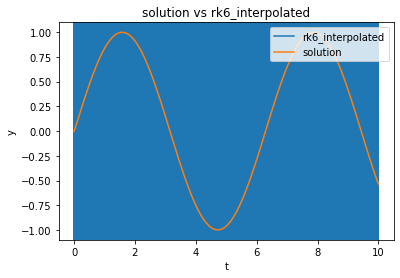

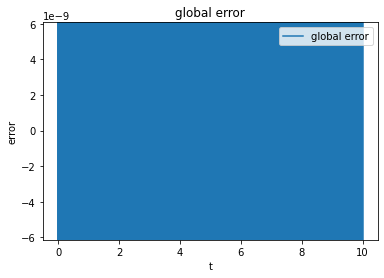

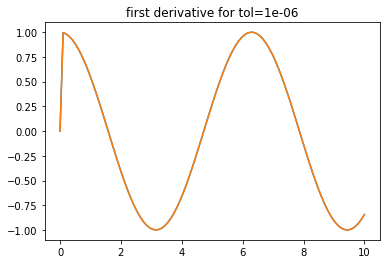

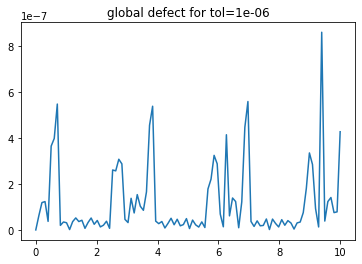

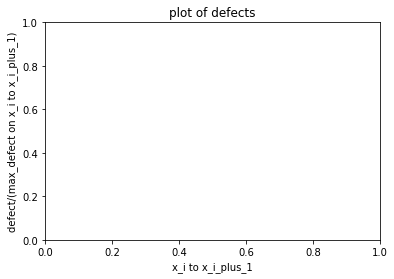

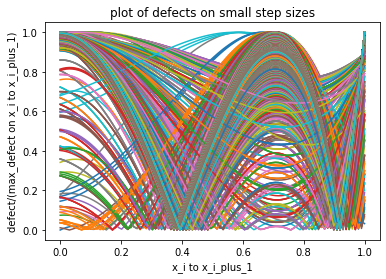

0.0
0.0
2.8918031164115732e-11
5.43298817393123e-11
7.655418573365713e-11
9.588383125674893e-11
1.1258792162460729e-10
7.691078581298361e-10
1.2696314841478817e-09
1.6417449882205615e-09
1.908705471453942e-09
2.090077428837378e-09
2.202279431734455e-09
2.259053300326941e-09
2.2718664744597605e-09
2.250256767380443e-09
2.202127518530217e-09
2.13400000795283e-09
2.0512291344643163e-09
1.958187466344352e-09
1.8584221835038495e-09
1.7547886858870765e-09
1.6495641103064784e-09
1.5445439337236078e-09
1.4411236058664567e-09
1.3403678306156408e-09
1.2430690157771984e-09
1.1497965496376494e-09
1.0609382990189875e-09
2.0924906252162145e-09
2.593550076090967e-09
2.7472069480394268e-09
2.68150986831861e-09
2.484857597462309e-09
2.2172746694248957e-09
1.918638810327611e-09
1.6146568318498034e-09
1.3211825869441363e-09
1.1582200962201306e-09
9.791002730796805e-10
8.539908225024817e-10
7.731527085219625e-10
7.242431793175186e-10
6.982134731492451e-10
6.884555286967853e-10
6.901648696988616e-10
6.9986

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.9999999999999997, 1.0, 2.0000000000000004, 0.9999999999999987, 1.0000000000000007, 0.5000000000000007, 2.0, 0.5, 0.5000000000000056, 1.0000000000000222, 1.000000000000011, 2.000000000000022, 2.0000000000000444, 1.9999999999996447, 2.0000000000007105, 0.5000000000000888, 0.4999999999999889, 0.9999999999999889, 0.49999999999982236]
n_steps 2525
n_successful_steps 1897

integration complete


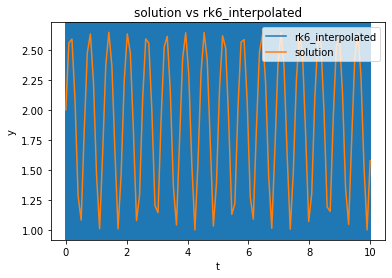

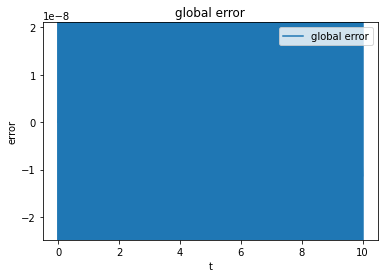

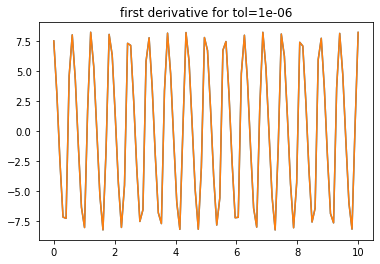

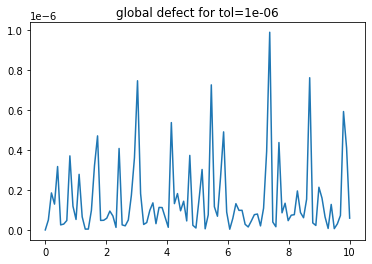

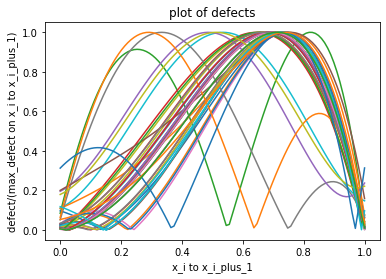

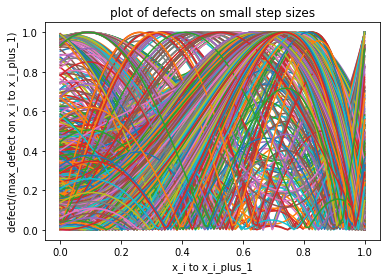

0.0
0.0
3.760129985153071e-10
7.444982408344458e-10
1.1043002068333863e-09
1.4544556670159636e-09
1.7941621521799789e-09
2.122747311261719e-09
2.439648927321514e-09
2.7443949335292928e-09
3.0365892023098695e-09
3.315896890399017e-09
3.582036001148481e-09
3.834768946830991e-09
4.0738936668560655e-09
4.299239630967122e-09
4.51066206608175e-09
4.70803884766724e-09
4.891266502937697e-09
5.060256214051151e-09
1.0537656969233922e-08
1.4909490531067604e-08
1.8179167948773056e-08
2.035011492651506e-08
2.1425596408164438e-08
2.1408633976705005e-08
2.0301996084270968e-08
1.81082513428521e-08
1.482988887246961e-08
1.0469514588606899e-08
5.0301531828722545e-09
4.866327341090937e-09
4.688434085409199e-09
4.496581329505034e-09
4.2908934183572e-09
4.071512904602059e-09
3.838604545336466e-09
3.5923597430098653e-09
3.3330005422271825e-09
3.0607849588193403e-09
2.776014529359827e-09
2.479040528413634e-09
2.1702768471243417e-09
1.8502079868198962e-09
1.5194050462241648e-09
1.1785439291145394e-09
8.284244

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


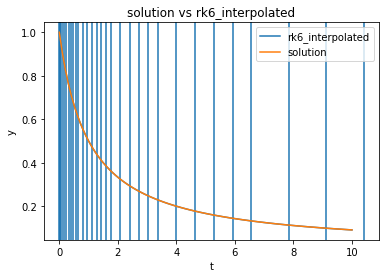

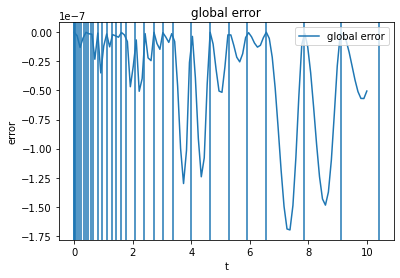

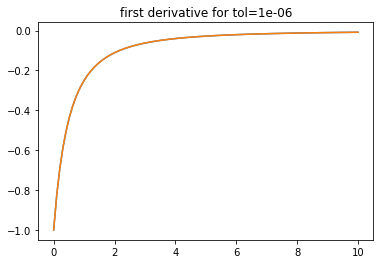

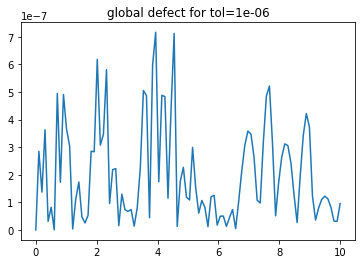

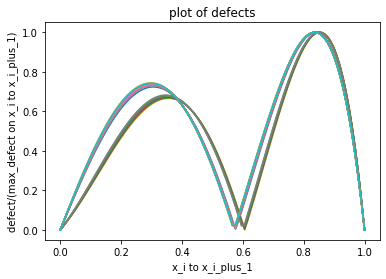

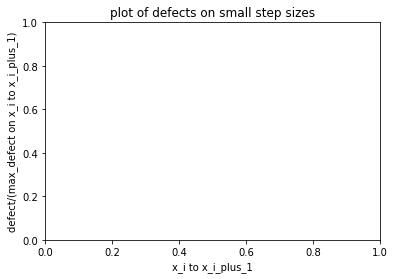

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-17
6.938893903907228e-17
6.938893903907228e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000056, 0.9999999999999944]
n_steps 75
n_successful_steps 60

integration complete


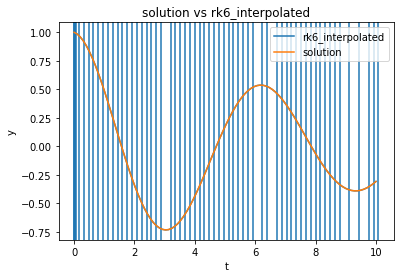

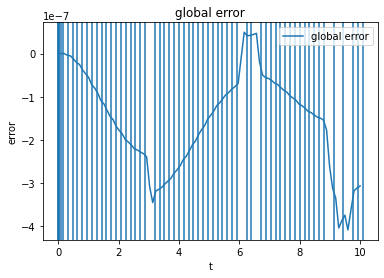

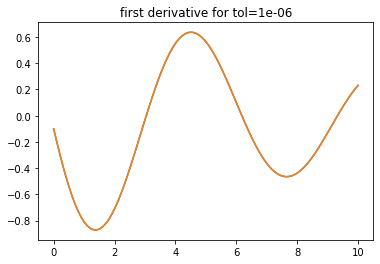

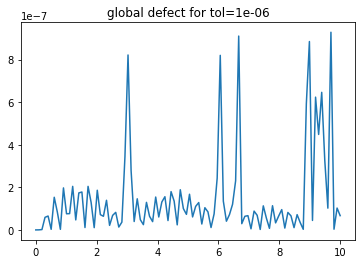

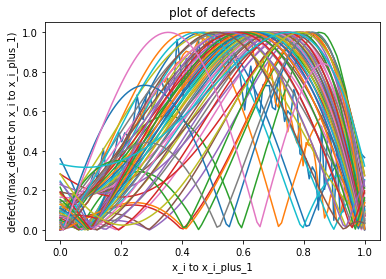

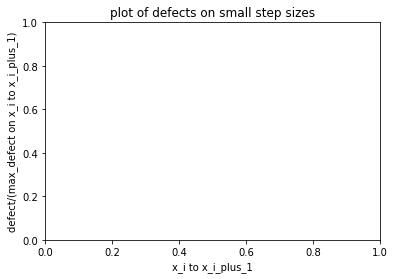

0.0
0.0
9.992007221626409e-16
2.2426505097428162e-14
3.752553823233029e-14
4.88290519129464e-11
4.5109738167070645e-09
1.2569699503472975e-08
2.3845975194447533e-08
3.789197755565965e-08
5.420461302030333e-08
7.224001791206192e-08
9.142863732769513e-08
1.1119048130836529e-07
1.3095016644648627e-07
1.501513663959564e-07
1.682703241190353e-07
1.8482811137143784e-07
1.9940136419815957e-07
2.116312701749834e-07
2.212306328130964e-07
2.2798889576236547e-07
2.3177506280891436e-07
3.177973665335898e-07
3.112879986000294e-07
3.020859965507938e-07
2.9043034932563216e-07
2.7661608359430545e-07
2.609849872325931e-07
2.4391543862467557e-07
2.2581162686940992e-07
2.070924570163335e-07
1.8818043064083856e-07
1.6949078635725146e-07
1.5142116641109205e-07
1.343420561461528e-07
1.1858821447052748e-07
1.0445128123537373e-07
9.217371310654698e-08
8.19441589028358e-08
7.389434797389072e-08
4.042933299253093e-08
4.00665063349237e-08
5.1216716701052434e-08
5.606354896992016e-08
6.246724926217695e-08
7.01664

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.5000000000000007, 0.9999999999999972]
n_steps 99
n_successful_steps 83

integration complete


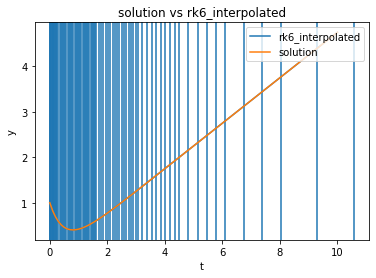

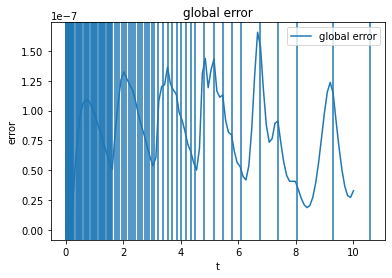

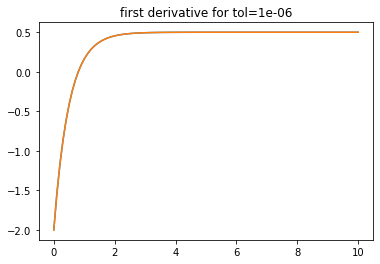

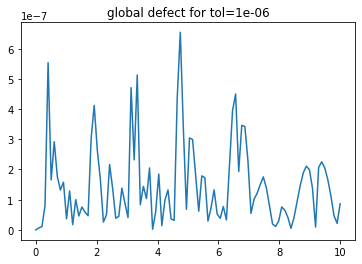

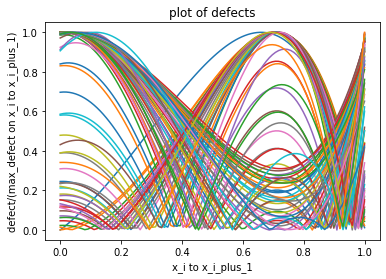

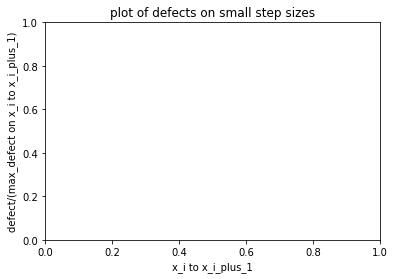

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
1.9863217737281502e-09
2.848214220030343e-09
3.639462287097217e-09
4.36428082561946e-09
5.0266627527051355e-09
5.630389821043025e-09
6.179043832155173e-09
6.6760149630695764e-09
7.1245130905950305e-09
2.8270073060276957e-08
4.612202397780152e-08
6.106182204312915e-08
7.343173613616472e-08
8.353862018806169e-08
9.165733422245026e-08
9.803385109252716e-08
1.0288807306135794e-07
1.0641638725772395e-07
1.0879398110175131e-07
1.1017694157011704e-07
1.1070415645297871e-07
1.1049903664295257e-07
1.0967107488824013e-07
1.0831725633098088e-07
1.0652333476413034e-07
1.0436498609767142e-07
1.019088514131461e-07
9.921347859931373e-08
9.633017311605485e-08
9.330376549154806e-08
9.017330360183706e-08
8.697267694923738e-08
8.373117910132066e-08
8.047401389710274e-08
7.722275124910638e-08
7.399573692667971e-08
7.08084608724846e-08
6.767388782691341e-08
6.460275392417003e-08
6.160383336784037e-08
5.868417574106388e-08
5.584931972446583e-08
5.31034842

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)